# model_selection 모듈

* 학습용 데이터와 테스트 데이터로 분리
* 교차 검증 분할 및 평가
* Estimator의 하이퍼 파라미터 튜닝을 위한 다양한 함수와 클래스 제공

## train_test_split() : 학습/테스트 데이터셋 분리

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
# train_test_split()은 4개를 return (vector 형태는 소문자, matrix 형태는 대문자)
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3) # train data 70% / test data 30% 비율대로 데이터가 랜덤하게 섞인다

model = LinearRegression()
model.fit(X_train, y_train) # 학습을 위해 fit() method. 학습용 데이터인 X_train, y_train을 준다. 

print("학습 데이터 점수 : {}".format(model.score(X_train, y_train))) # 학습데이터에 대한 점수 확인 (0 ~ 1)
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test))) # 평가데이터에 대한 점수 확인 (0 ~ 1


학습 데이터 점수 : 0.5340137746211778
평가 데이터 점수 : 0.4554119451549796


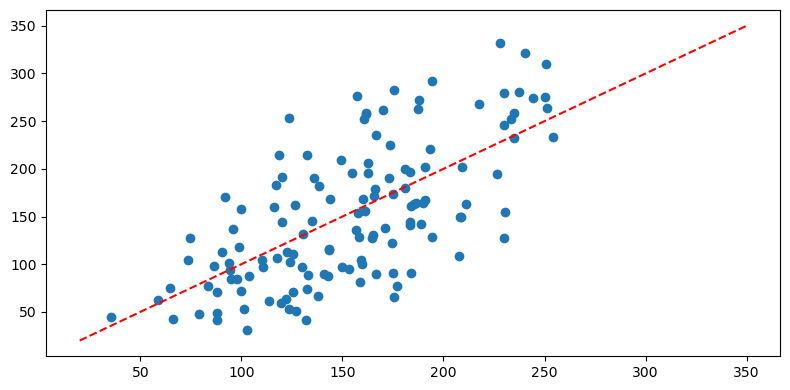

In [6]:
import matplotlib.pyplot as plt

predicted = model.predict(X_test)
expected = y_test
plt.figure(figsize=(8, 4))
plt.scatter(predicted, expected)
plt.plot([20, 350], [20, 350], '--r') 
plt.tight_layout()

'''
diabetes data가 넓게 분포되어있는 것을 알 수 있다.
'--r'에 가까울수록 잘 맞는 것인데, 다음은 가깝지 않은 것들이 많다.
따라서 다른 모델을 사용하거나 데이터 전처리를 통해서 개선해야 한다.
'''

## cross_val_score() : 교차 검증

In [8]:
from sklearn.model_selection import cross_val_score, cross_validate

diabetes = load_diabetes()
# train_test_split()은 4개를 return (vector 형태는 소문자, matrix 형태는 대문자)
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3) # train data 70% / test data 30% 비율대로 데이터가 랜덤하게 섞인다

model = LinearRegression()
model.fit(X_train, y_train) # 학습을 위해 fit() method. 학습용 데이터인 X_train, y_train을 준다. 

LinearRegression()

In [10]:
import numpy as np

scores = cross_val_score(model, diabetes.data, diabetes.target, cv=5) # cross validation을 위해 몇 개로 나눌지 (cv=5)

print("교차 검증 정확도 : {}".format(scores))
print("교차 검증 정확도 평균 : {} +/- {}".format(np.mean(scores), np.std(scores)))

교차 검증 정확도 : [0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
교차 검증 정확도 평균 : 0.48231643590864215 +/- 0.049268577511903826


## GridSearchSV : 교차 검증과 최적 하이퍼 파라미터 찾기
- 훈련 단계에서 학습한 파라미터에 영향을 받아서 최상의 파라미터를 찾는 일은 항상 어려운 문제
- 다양한 모델의 훈련 과정을 자동화하고, 교차 검사를 사용해 최적값을 제공하는 도구 필요

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000] 
param_grid = dict(alpha=alpha) # parameter값을 모두 다르게 하여 모델을 계속 cross_validation(교차검증) 진행

gs = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=10) 
result = gs.fit(diabetes.data, diabetes.target)

print("최적 점수 : {}".format(result.best_score_))
print("최적 파라미터 : {}".format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

최적 점수 : 0.46332219117960366
최적 파라미터 : {'alpha': 0.1}
Ridge(alpha=0.1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000428,0.000129,0.000144,0.000044,0.001,{'alpha': 0.001},0.554416,0.233683,0.356798,0.620262,0.267029,0.619402,0.419900,0.433004,0.433424,0.684991,0.462291,0.145852,3
1,0.000294,0.000172,0.000107,0.000022,0.01,{'alpha': 0.01},0.546298,0.244129,0.368900,0.613735,0.271714,0.623092,0.426068,0.424745,0.429477,0.680918,0.462908,0.141449,2
2,0.000209,0.000006,0.000091,0.000004,0.1,{'alpha': 0.1},0.526551,0.244984,0.383530,0.606595,0.286090,0.618034,0.431226,0.441777,0.431962,0.662471,0.463322,0.132683,1
3,0.000198,0.000003,0.000088,0.000002,1,{'alpha': 1},0.421594,0.168441,0.358004,0.512609,0.284926,0.514263,0.388244,0.484445,0.396497,0.525135,0.405416,0.108386,4
4,0.000208,0.000007,0.000091,0.000004,10,{'alpha': 10},0.159387,-0.081177,0.152189,0.165690,0.119348,0.186933,0.158146,0.203748,0.153626,0.189441,0.140733,0.077298,5
5,0.000202,0.000008,0.000090,0.000006,100,{'alpha': 100},0.012468,-0.234480,0.013522,-0.012820,0.004838,0.022647,0.022028,-0.009908,0.015589,0.026427,-0.013969,0.074561,6
6,0.000197,0.000006,0.000085,0.000002,1000,{'alpha': 1000},-0.009602,-0.258118,-0.007849,-0.038479,-0.012933,-0.000932,0.001768,-0.042679,-0.004652,0.002744,-0.037073,0.075191,7


## multiprocessing을 이용한 GridSearchCV

In [13]:
import multiprocessing 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

param_grid = [{
        'penalty' : ['l1', 'l2'],
        'C' : [0.5, 1.0, 1.5, 1.8, 2.0, 2.4]
}]

gs = GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid=param_grid,
    scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count()
) # cpu개수만큼 job생성하여 수행
result = gs.fit(iris.data, iris.target)

print("최적 점수 : {}".format(result.best_score_))
print("최적 파라미터 : {}".format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

최적 점수 : 0.9800000000000001
최적 파라미터 : {'C': 2.4, 'penalty': 'l2'}
LogisticRegression(C=2.4)


/Users/ihyeongseob/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ihyeongseob/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000791,0.001796,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.006412,0.003133,0.000277,0.000075,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",1.0,0.933333,1.0,0.933333,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.966667,0.033333,6
2,0.000148,0.000028,0.000000,0.000000,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.013255,0.005972,0.000304,0.000118,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,2
4,0.000178,0.000112,0.000000,0.000000,1.5,l1,"{'C': 1.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
5,0.009444,0.005584,0.000407,0.000473,1.5,l2,"{'C': 1.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,2
6,0.000127,0.000013,0.000000,0.000000,1.8,l1,"{'C': 1.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,0.007424,0.004566,0.000352,0.000416,1.8,l2,"{'C': 1.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,2
8,0.000129,0.000021,0.000000,0.000000,2.0,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
9,0.008656,0.005547,0.000260,0.000111,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,2
